x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 26s 54ms/step - loss: 0.7840 - accuracy: 0.7595 - val_loss: 0.2456 - val_accuracy: 0.9254
Epoch 2/12
469/469 [==============================] - 24s 52ms/step - loss: 0.2150 - accuracy: 0.9373 - val_loss: 0.1650 - val_accuracy: 0.9505
Epoch 3/12
469/469 [==============================] - 25s 52ms/step - loss: 0.1640 - accuracy: 0.9511 - val_loss: 0.1361 - val_accuracy: 0.9600
Epoch 4/12
469/469 [==============================] - 25s 53ms/step - loss: 0.1354 - accuracy: 0.9593 - val_loss: 0.1209 - val_accuracy: 0.9632
Epoch 5/12
469/469 [==============================] - 25s 53ms/step - loss: 0.1169 - accuracy: 0.9646 - val_loss: 0.1014 - val_accuracy: 0.9685
Epoch 6/12
469/469 [==============================] - 25s 54ms/step - loss: 0.1039 - accuracy: 0.9684 - val_loss: 0.0916 - val_accuracy: 0.9710
Epoch 7/12
469/469 [==============================] - 25s 54ms/

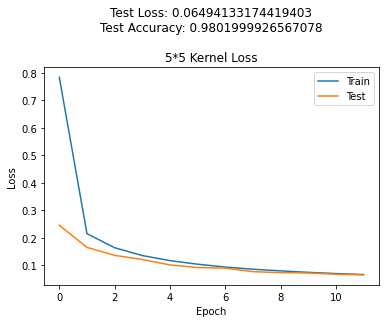

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f"Test Loss: {score[0]}\nTest Accuracy: {score[1]}\n\n5*5 Kernel Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()